Check Facial detection on a  single image

29 19 168 168


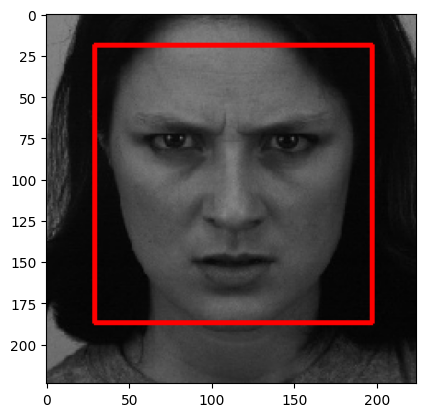

In [3]:
import cv2
import dlib
import matplotlib.pyplot as plt

# Load the Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(r"archive\Cascades\haarcascade_frontalface_default.xml")

# Load the Dlib shape predictor for facial landmarks
predictor = dlib.shape_predictor(r"archive\Cascades\shape_predictor_68_face_landmarks.dat")
image_path = r"archive\fer_ckplus_kdef\anger\AF01ANS.png"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces using the Haar Cascade classifier
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30,30))

for (x, y, w, h) in faces:
    print(x,y,w,h)
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0),  2)

# Display the result
plt.imshow(image)
plt.show()

Check points detection on single image

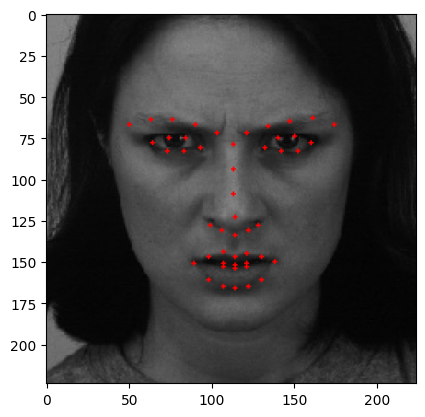

In [4]:
# Load the Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(r'archive\Cascades\haarcascade_frontalface_default.xml')

# Load the Dlib shape predictor for facial landmarks
predictor = dlib.shape_predictor(r"archive\Cascades\shape_predictor_68_face_landmarks.dat")
image_path = r"archive\fer_ckplus_kdef\anger\AF01ANS.png"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces using the Haar Cascade classifier
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(0,0))


for (x,y,w,h) in faces:
    face = dlib.rectangle(x, y, x + w, y + h)
    # Get the facial landmarks
    landmarks = predictor(gray, face)
    landmark_points = [num for num in range(17, 68) if num not in (60, 64)]
    # Extract X and Y coordinates for landmarks
    landmarks_list = [(landmarks.part(i).x, landmarks.part(i).y) for i in landmark_points]

    # Draw points on the face
    for (x, y) in landmarks_list:
        cv2.circle(image, (x, y), 1, (255, 0, 0), -1)
    

# Display the result
plt.imshow(image)
plt.show()

Marks on cropped face

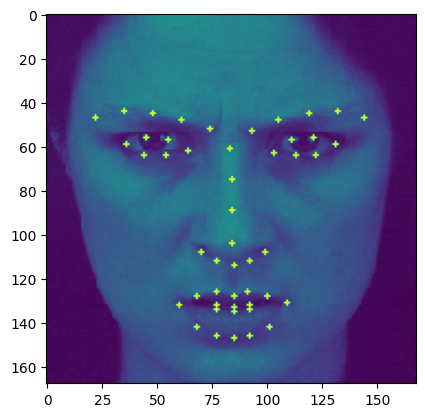

In [5]:
# Load the Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(r'archive\Cascades\haarcascade_frontalface_default.xml')

# Load the Dlib shape predictor for facial landmarks
predictor = dlib.shape_predictor(r"archive\Cascades\shape_predictor_68_face_landmarks.dat")
image_path = r"archive\fer_ckplus_kdef\anger\AF01ANS.png"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces using the Haar Cascade classifier
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(0,0))


for (x,y,w,h) in faces:
    face = dlib.rectangle(x, y, x + w, y + h)
    # Extracting Region of interest
    face_roi = gray[y:y + h, x:x + w]
    h,w = face_roi.shape
    face = dlib.rectangle(0, 0, w, h)
    # Get the facial landmarks
    landmarks = predictor(face_roi, face)
    landmark_points = [num for num in range(17, 68) if num not in (60, 64)]
    # Extract X and Y coordinates for landmarks
    landmarks_list = [(landmarks.part(i).x, landmarks.part(i).y) for i in landmark_points]

    # Draw points on the face
    for (x, y) in landmarks_list:
        cv2.circle(face_roi, (x, y), 1, (255, 0, 0), -1)
    

# Display the result
plt.imshow(face_roi)
plt.show()

Check Generated CSV File

In [6]:
import pandas as pd
df = pd.read_csv("facial_landmarks_with_distances.csv")
df

,Category,Distance_0_1,Distance_0_2,Distance_0_3,Distance_0_4,Distance_0_5,Distance_0_6,Distance_0_7,Distance_0_8,Distance_0_9,...,Distance_44_45,Distance_44_46,Distance_44_47,Distance_44_48,Distance_45_46,Distance_45_47,Distance_45_48,Distance_46_47,Distance_46_48,Distance_47_48
0,anger,13.341664,27.018512,40.049969,53.235327,71.344236,83.024093,96.005208,109.073370,123.000000,...,6.082763,7.071068,2.236068,7.071068,2.236068,5.830952,13.152946,6.082763,14.000000,8.062258
1,anger,12.649111,26.305893,38.052595,52.086467,75.059976,85.005882,97.082439,109.165013,120.037494,...,6.082763,6.000000,1.414214,8.000000,1.000000,7.280110,14.035669,7.071068,14.000000,7.071068
2,anger,13.038405,26.248809,38.639358,53.084838,76.026311,86.209048,98.412398,109.293184,118.016948,...,6.082763,6.708204,3.162278,7.615773,4.000000,6.403124,13.601471,5.000000,13.000000,8.000000
3,anger,12.083046,25.495098,38.052595,51.039201,75.059976,86.005814,98.127468,111.072049,122.004098,...,8.062258,8.000000,1.414214,8.000000,1.000000,7.280110,16.031220,7.071068,16.000000,9.055385
4,anger,12.649111,26.305893,40.012498,55.145263,75.026662,89.050547,103.174609,118.152444,132.003788,...,7.071068,7.000000,2.236068,9.000000,1.000000,8.544004,16.031220,8.246211,16.000000,8.246211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13764,surprise,17.029386,33.286634,47.169906,61.814238,103.484298,119.364986,135.484316,150.651917,161.003106,...,8.062258,12.041595,8.000000,12.041595,8.000000,10.630146,17.888544,8.062258,16.000000,8.062258
13765,surprise,17.804494,33.600595,48.466483,63.150614,110.652610,126.289350,143.544418,158.808060,169.011834,...,8.000000,8.062258,3.000000,9.848858,4.123106,8.544004,17.464249,7.071068,16.000000,9.055385
13766,surprise,17.029386,34.132096,48.083261,64.381674,92.265920,108.903627,126.150704,142.506140,154.003247,...,6.000000,10.816654,9.055385,13.453624,9.000000,11.401754,18.027756,7.000000,15.033296,8.062258
13767,surprise,18.439089,35.805028,50.695167,67.268120,97.739450,116.400172,134.495353,150.748134,162.012345,...,7.071068,8.602325,5.099020,11.180340,4.000000,8.944272,17.464249,8.000000,17.000000,9.000000


In [7]:
df.shape

(13769, 1177)

In [25]:
df1 = df.groupby("Category").mean()
df1

,Distance_0_1,Distance_0_2,Distance_0_3,Distance_0_4,Distance_0_5,Distance_0_6,Distance_0_7,Distance_0_8,Distance_0_9,Distance_0_10,...,Distance_46_47,Distance_46_48,Distance_46_49,Distance_46_50,Distance_47_48,Distance_47_49,Distance_47_50,Distance_48_49,Distance_48_50,Distance_49_50
Category,,,,,,,,,,,,,,,,,,,,,
anger,14.474709,28.992144,43.226893,57.872514,83.985615,98.581791,114.025791,129.210177,141.061461,72.116720,...,18.079420,7.343010,11.648775,19.009352,18.946765,26.551679,35.079828,8.049254,16.854457,8.925749
contempt,16.167979,32.138953,47.772338,63.610058,93.861321,110.171954,127.119704,143.360685,155.116650,79.708486,...,20.959748,4.728260,11.014983,20.148237,21.760266,30.553786,40.273534,9.150120,18.981075,9.940498
disgust,15.184411,30.544450,45.657687,61.106933,88.360467,104.173936,121.021911,137.409143,149.972908,75.423682,...,19.163584,6.053554,11.920871,20.863777,19.569442,28.683897,38.647629,9.433601,19.573188,10.271145
fear,14.480213,28.885548,42.875060,56.829494,85.788562,100.840159,116.467770,131.171341,142.012618,72.292705,...,19.126227,7.607016,11.770446,19.129069,19.536527,27.291538,35.944652,8.110934,17.016556,8.999755
happiness,14.557088,28.889556,42.835741,56.691464,87.746082,102.187622,117.481021,132.143950,143.092811,73.603585,...,23.740876,8.768009,14.343771,23.178151,25.044941,34.904928,45.291765,10.235439,21.188700,11.094228
neutrality,14.659817,29.155873,43.227804,57.402157,86.810963,101.712314,117.377133,132.396972,143.677961,73.691454,...,18.156274,5.420097,10.286249,18.070140,19.065535,26.645353,35.146345,7.978551,16.648216,8.771749
sadness,14.628669,29.265188,43.686695,58.061037,86.033379,101.004896,116.720597,131.584908,143.119970,73.260469,...,18.304223,5.820105,10.545579,18.338594,19.094153,26.725687,35.343994,8.042105,16.857143,8.924451
surprise,14.623254,28.816236,42.189991,55.631596,87.504948,102.196915,117.662141,132.022315,142.223977,72.959476,...,18.295883,10.305192,13.437866,19.416613,18.764144,25.775322,33.703235,7.483718,15.811828,8.428225


In [21]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import joblib

# Load the CSV file containing facial landmarks with distances
data = pd.read_csv("facial_landmarks_with_distances.csv")

# Extract features (X) and labels (y)
X = data.drop("Category", axis=1)
y = data["Category"]

# Normalize the feature data (X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=10)  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train an SVM classifier
svm_classifier = SVC(kernel="linear", C=1.0)  # You can adjust the kernel and hyperparameters
svm_classifier.fit(X_train_pca, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average= "weighted")

print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Save the models to files
joblib.dump(svm_classifier, 'svm_model.joblib')
joblib.dump(pca, 'pca_model.joblib')

ModuleNotFoundError: No module named 'sklearn'

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
# Load the CSV file containing facial landmarks with distances
data = pd.read_csv("facial_landmarks_with_distances.csv")

# Extract features (X) and labels (y)
X = data.drop("Category", axis=1)
y = data["Category"]

# Normalize the feature data (X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=10)  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [6]:
# Train an SVM classifier
svm_classifier = SVC(kernel="linear", C=1.0)  # You can adjust the kernel and hyperparameters
svm_classifier.fit(X_train_pca, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average= "weighted")

print("F1 Score:", f1)
print("Accuracy:", accuracy)

F1 Score: 0.4360655037056841
Accuracy: 0.5043599581444018


In [5]:
X_train_pca.shape

(11468, 10)

In [ ]:
# Save the models to files
joblib.dump(svm_classifier, 'svm_model.joblib')
joblib.dump(pca, 'pca_model.joblib')

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
#import joblib

# Load the CSV file containing facial landmarks with distances
data = pd.read_csv("facial_landmarks_with_distances.csv")

# Extract features (X) and labels (y)
X = data.drop("Category", axis=1)
y = data["Category"]
y = y.values
# Normalize the feature data (X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
y_encoded = encoder.fit_transform(y.reshape(-1,1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

"""# Perform PCA to reduce dimensionality (adjust the number of components based on your needs)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)"""

# Build a small 4-layer neural network
model = Sequential()
model.add(Dense(512, input_dim=1176, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(6, activation='softmax')) 

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the neural network
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_test_decoded = [y.argmax() for y in y_test]
y_pred_decoded = [y.argmax() for y in y_pred]
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
f1 = f1_score(y_test_decoded, y_pred_decoded, average="weighted")

print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Save the model to a file
model.save('nn_model.h5')
#joblib.dump(pca, 'pca_model.joblib')

c:\Users\HP\Documents\GitHub\Interactive-Visualization-FAU-Project - Copy\.venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50


345/345 [==============================] - 3s 6ms/step - loss: 1.3530 - accuracy: 0.4902 - val_loss: 1.2995 - val_accuracy: 0.5221
Epoch 2/50
345/345 [==============================] - 2s 5ms/step - loss: 1.2150 - accuracy: 0.5450 - val_loss: 1.2500 - val_accuracy: 0.5269
Epoch 3/50
345/345 [==============================] - 2s 5ms/step - loss: 1.1634 - accuracy: 0.5627 - val_loss: 1.1884 - val_accuracy: 0.5694
Epoch 4/50
345/345 [==============================] - 2s 5ms/step - loss: 1.1315 - accuracy: 0.5749 - val_loss: 1.1992 - val_accuracy: 0.5556
Epoch 5/50
345/345 [==============================] - 2s 5ms/step - loss: 1.1068 - accuracy: 0.5846 - val_loss: 1.1845 - val_accuracy: 0.5690
Epoch 6/50
345/345 [==============================] - 2s 5ms/step - loss: 1.0852 - accuracy: 0.5898 - val_loss: 1.1506 - val_accuracy: 0.5788
Epoch 7/50
345/345 [==============================] - 2s 5ms/step - loss: 1.0610 - accuracy: 0.5995 - val_loss: 1.1322 - val_accuracy: 0.5832
Epoc

c:\Users\HP\Documents\GitHub\Interactive-Visualization-FAU-Project - Copy\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import EarlyStopping
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
#import joblib

# Load the CSV file containing facial landmarks with distances
data = pd.read_csv("facial_landmarks_with_distances.csv")

# Extract features (X) and labels (y)
X = data.drop("Category", axis=1)
y = data["Category"]
y = y.values

X_mean = X.mean()
X_std = X.std()
# Normalize the feature data (X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
y_encoded = encoder.fit_transform(y.reshape(-1,1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

"""# Perform PCA to reduce dimensionality (adjust the number of components based on your needs)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)"""

# Build a neural network
model = Sequential()
model.add(Dense(512, input_dim=1176, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax')) 

# Compile the model
optimizer = Adam(learning_rate=0.01) 
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the neural network
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
y_pred = model.predict(X_test)
y_test_decoded = [y.argmax() for y in y_test]
y_pred_decoded = [y.argmax() for y in y_pred]
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
f1 = f1_score(y_test_decoded, y_pred_decoded, average="weighted")

print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Save the model to a file
model.save('nn_model.h5')
#joblib.dump(pca, 'pca_model.joblib')

c:\Users\HP\Documents\GitHub\Interactive-Visualization-FAU-Project - Copy\.venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
345/345 [==============================] - 5s 8ms/step - loss: 1.6435 - accuracy: 0.3594 - val_loss: 1.4007 - val_accuracy: 0.4670
Epoch 2/50
345/345 [==============================] - 2s 7ms/step - loss: 1.4660 - accuracy: 0.4395 - val_loss: 1.3372 - val_accuracy: 0.4887
Epoch 3/50
345/345 [==============================] - 3s 7ms/step - loss: 1.4135 - accuracy: 0.4639 - val_loss: 1.3176 - val_accuracy: 0.5015
Epoch 4/50
345/345 [==============================] - 2s 7ms/step - loss: 1.4069 - accuracy: 0.4691 - val_loss: 1.2980 - val_accuracy: 0.5029
Epoch 5/50
345/345 [==============================] - 2s 7ms/step - loss: 1.3848 - accuracy: 0.4701 - val_loss: 1.2795 - val_accuracy: 0.5025
Epoch 6/50
345/345 [==============================] - 2s 7ms/step - loss: 1.3695 - accuracy: 0.4773 - val_loss: 1.2749 - val_accuracy: 0.5033
Epoch 7/50
345/345 [==============================] - 2s 7ms/step - loss: 1.3638 - accuracy: 0.4812 - val_loss: 1.2619 - val_accuracy: 0.5305
Epoch 

c:\Users\HP\Documents\GitHub\Interactive-Visualization-FAU-Project - Copy\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [5]:
#! .venv\Scripts\python.exe

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import EarlyStopping
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam

# Load the CSV file containing facial landmarks with distances
data = pd.read_csv("facial_landmarks_with_distances.csv")

# Extract features (X) and labels (y)
X = data.drop("Category", axis=1)
y = data["Category"]
y = y.values

# Normalize the feature data (X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
y_encoded = encoder.fit_transform(y.reshape(-1,1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Perform PCA to reduce dimensionality (adjust the number of components based on your needs)
# pca = PCA(n_components=10)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

# Build a neural network
model = Sequential()
model.add(Dense(64, input_dim=1176, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))  

model.add(Dense(32, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(32, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax')) 

# Compile the model
# optimizer = Adam(learning_rate=0.01) 
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the neural network
history = model.fit(X_train, y_train, epochs= 30, batch_size= 16, validation_data=(X_test, y_test))#, callbacks=[early_stopping])

# Evaluate the model
y_pred = model.predict(X_test)
y_test_decoded = [y.argmax() for y in y_test]
y_pred_decoded = [y.argmax() for y in y_pred]
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
f1 = f1_score(y_test_decoded, y_pred_decoded, average="weighted")

print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Save the model to a file
#model.save('nn_model.h5')


c:\Users\HP\Documents\GitHub\Interactive-Visualization-FAU-Project - Copy\.venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Epoch 1/30
689/689 [==============================] - 2s 2ms/step - loss: 1.3590 - accuracy: 0.4799 - val_loss: 1.3297 - val_accuracy: 0.5033
Epoch 2/30
689/689 [==============================] - 1s 2ms/step - loss: 1.2112 - accuracy: 0.5345 - val_loss: 1.2139 - val_accuracy: 0.5436
Epoch 3/30
689/689 [==============================] - 1s 2ms/step - loss: 1.1635 - accuracy: 0.5509 - val_loss: 1.2270 - val_accuracy: 0.5541
Epoch 4/30
689/689 [==============================] - 2s 2ms/step - loss: 1.1341 - accuracy: 0.5613 - val_loss: 1.1852 - val_accuracy: 0.5592
Epoch 5/30
689/689 [==============================] - 2s 3ms/step - loss: 1.1089 - accuracy: 0.5729 - val_loss: 1.1771 - val_accuracy: 0.5595
Epoch 6/30
689/689 [==============================] - 2s 3ms/step - loss: 1.0867 - accuracy: 0.5770 - val_loss: 1.2038 - val_accuracy: 0.5577
Epoch 7/30
689/689 [==============================] - 2s 3ms/step - loss: 1.0709 - accuracy: 0.5845 - val_loss: 1.1589 - val_accuracy: 0.5737
Epoch

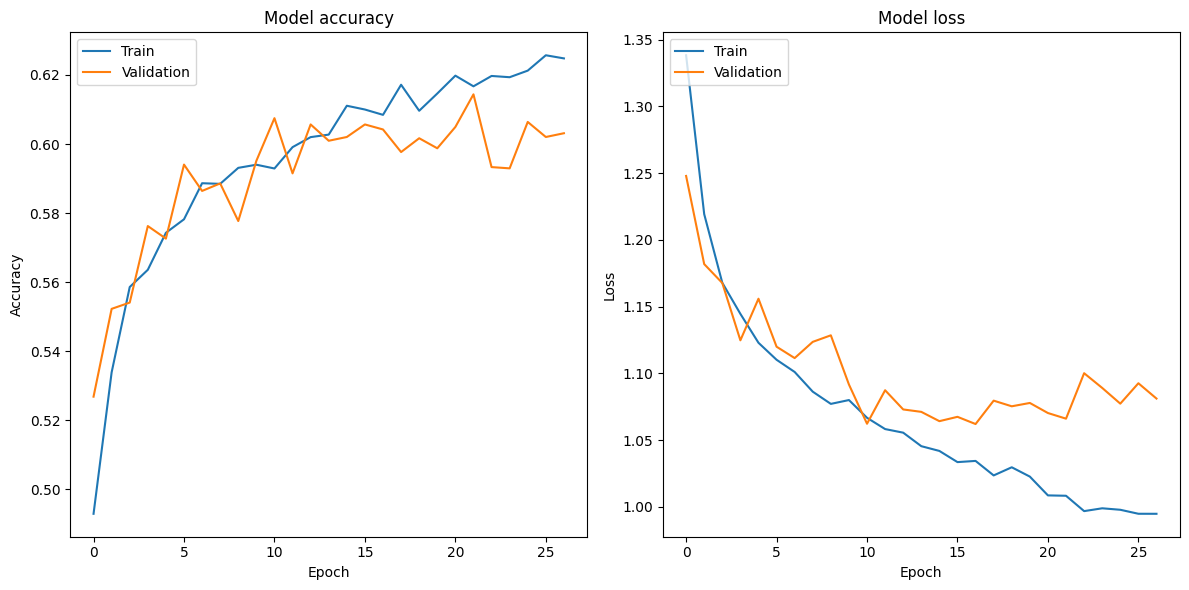

In [4]:
import matplotlib.pyplot as plt
# Plot training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the plot_history function with the training history
plot_history(history)

In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Load the CSV file containing facial landmarks with distances
data = pd.read_csv("facial_landmarks_with_distances.csv")

# Extract features (X) and labels (y)
X = data.drop("Category", axis=1)
y = data["Category"]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier on the training data and collect training history
history = svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
f1_sco = f1_score(y_test, y_pred, average="weighted")
print(f'Accuracy: {accuracy}')
print(f'f1_Score: {f1_sco}')


Accuracy: 0.6161946259985476
f1_Score: 0.601853096555686


In [19]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Load the CSV file containing facial landmarks with distances
data = pd.read_csv("facial_landmarks_with_distances.csv")

# Extract features (X) and labels (y)
X = data.drop("Category", axis=1)
y = data["Category"]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Support Vector Machine classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the classifier on the training data and collect training history
history = svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
f1_sco = f1_score(y_test, y_pred, average="weighted")
print(f'Accuracy: {accuracy}')
print(f'f1_Score: {f1_sco}')


Accuracy: 0.6038489469862018
f1_Score: 0.5714014455908846


In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Load the CSV file containing facial landmarks with distances
data = pd.read_csv("facial_landmarks_with_distances.csv")

# Extract features (X) and labels (y)
X = data.drop("Category", axis=1)
y = data["Category"]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', C = 0.25)

# Train the classifier on the training data and collect training history
history = svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
f1_sco = f1_score(y_test, y_pred, average="weighted")
print(f'Accuracy: {accuracy}')
print(f'f1_Score: {f1_sco}')


Accuracy: 0.6176470588235294
f1_Score: 0.6010849391203381


In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the CSV file containing facial landmarks with distances
data = pd.read_csv("facial_landmarks_with_distances.csv")

# Extract features (X) and labels (y)
X = data.drop("Category", axis=1)
y = data["Category"]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a base SVM model
base_svm = SVC(kernel='linear', C=0.5)

# Create a BaggingClassifier with SVM as the base estimator
ensemble_svm = BaggingClassifier(base_svm, n_estimators=10, random_state=42)

# Train the ensemble SVM on the training data
ensemble_svm.fit(X_train, y_train)

# Make predictions on the testing data
ensemble_predictions = ensemble_svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'Ensemble Accuracy: {accuracy}')


Ensemble Accuracy: 0.6198257080610022


In [12]:
import mean_std_ofdata as ms
mean,std = ms.mean_std_of_data("facial_landmarks_with_distances.csv")

In [13]:
mean.shape

(1, 1176)

In [10]:
import numpy as np

X_mean_array = np.array(mean).reshape(1, -1)
X_std_array = np.array(std).reshape(1, -1)

print(X_mean_array.shape)
print(X_std_array.shape)

(1, 1176)
(1, 1176)
